In [ ]:
# 패키지 설치
!pip install yfinance --quiet

In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize
sns.set()

데이터 읽기

In [3]:
# ETF 데이터 다운로드
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']


# 수익률 벡터와 공분산 행렬


[*********************100%***********************]  9 of 9 completed


In [21]:
# 색깔 팔레트


### 시가총액 가중

In [15]:
import requests
import urllib 
class YFinance:
    user_agent_key = "User-Agent"
    user_agent_value = ("Mozilla/5.0 (Windows NT 6.1; Win64; x64) "
                        "AppleWebKit/537.36 (KHTML, like Gecko) "
                        "Chrome/58.0.3029.110 Safari/537.36")
    
    def __init__(self, ticker):
        self.yahoo_ticker = ticker

    def __str__(self):
        return self.yahoo_ticker

    def _get_yahoo_cookie(self):
        cookie = None

        headers = {self.user_agent_key: self.user_agent_value}
        response = requests.get("https://fc.yahoo.com",
                                headers=headers,
                                allow_redirects=True)

        if not response.cookies:
            raise Exception("Failed to obtain Yahoo auth cookie.")

        cookie = list(response.cookies)[0]

        return cookie

    def _get_yahoo_crumb(self, cookie):
        crumb = None

        headers = {self.user_agent_key: self.user_agent_value}

        crumb_response = requests.get(
            "https://query1.finance.yahoo.com/v1/test/getcrumb",
            headers=headers,
            cookies={cookie.name: cookie.value},
            allow_redirects=True,
        )
        crumb = crumb_response.text

        if crumb is None:
            raise Exception("Failed to retrieve Yahoo crumb.")

        return crumb

    @property
    def info(self):
        # Yahoo modules doc informations :
        # https://cryptocointracker.com/yahoo-finance/yahoo-finance-api
        cookie = self._get_yahoo_cookie()
        crumb = self._get_yahoo_crumb(cookie)
        info = {}
        ret = {}

        headers = {self.user_agent_key: self.user_agent_value}

        yahoo_modules = ("summaryDetail,"
                         "financialData,"
                         "indexTrend,"
                         "defaultKeyStatistics")

        url = ("https://query1.finance.yahoo.com/v10/finance/"
               f"quoteSummary/{self.yahoo_ticker}"
               f"?modules={urllib.parse.quote_plus(yahoo_modules)}"
               f"&ssl=true&crumb={urllib.parse.quote_plus(crumb)}")

        info_response = requests.get(url,
                                     headers=headers,
                                     cookies={cookie.name: cookie.value},
                                     allow_redirects=True)

        info = info_response.json()
        info = info['quoteSummary']['result'][0]

        for mainKeys in info.keys():
            for key in info[mainKeys].keys():
                if isinstance(info[mainKeys][key], dict):
                    try:
                        ret[key] = info[mainKeys][key]['raw']
                    except (KeyError, TypeError):
                        pass
                else:
                    ret[key] = info[mainKeys][key]

        return ret

In [18]:
# ETF별 시가총액 데이터 다운로드


In [19]:
# 시장 가중 비율 계산


XLB    0.024390
XLE    0.179156
XLF    0.131342
XLI    0.065240
XLK    0.222139
XLP    0.074473
XLU    0.062309
XLV    0.168469
XLY    0.072481
dtype: float64

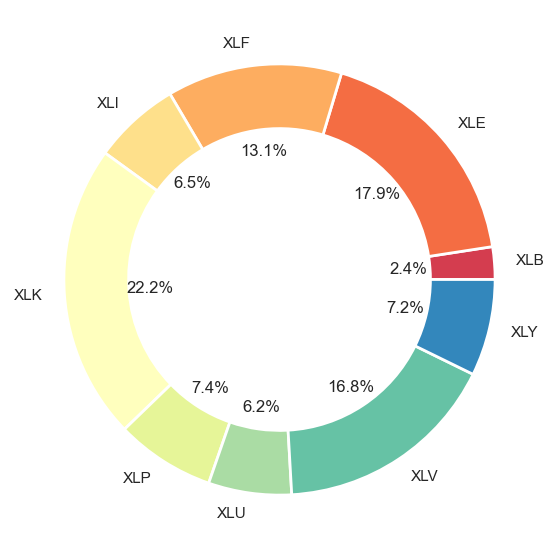

In [22]:
# 파이차트 시각화


In [23]:
# 시장 포트폴리오 수익률 평균 및 분산


0.09298978297085708 0.032777856582852934


In [24]:
# 위험회피계수


0.5136235861287147


### 블랙-리터만 역최적화

In [25]:
# 균형기대수익률


XLB    0.018007
XLE    0.019457
XLF    0.021393
XLI    0.018202
XLK    0.018100
XLP    0.009215
XLU    0.011048
XLV    0.013156
XLY    0.017957
dtype: float64

### 투자자 전망과 기대수익률 그리고 전망의 불확실성 계산

In [27]:
# 투자자 전망 -> 섹터 별 애널들의 뷰 -> 하우스 뷰 


# 위험조정상수

# 투자자 전망의 불확실성 계산


In [28]:
omega

array([[0.0014446 , 0.        , 0.        ],
       [0.        , 0.00100163, 0.        ],
       [0.        , 0.        , 0.00128433]])

블랙-리터만 모델 최적화

In [29]:
# 투자자 전망과 합쳐진 균형초과수익률 계산

# 블랙-리터만 모형에 기반한 사후 분포


In [30]:
# MVO 모델 가중치 산출 함수


In [31]:
# BL 포트폴리오 가중치

# BL 포트폴리오 수익률

# BL 포트폴리오 변동성


In [32]:
# BL 포트폴리오 수익률과 변동성


0.05064978663019983 0.020633365169108665


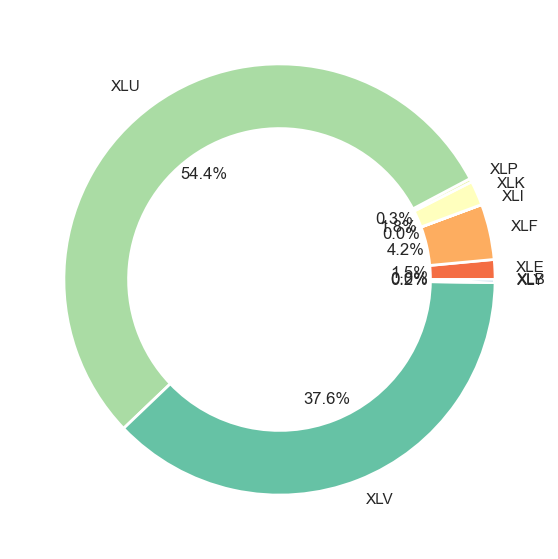

In [33]:
# 블랙-리터만 투자 가중치 데이터프레임

# 파이차트 시각화


Copyright 2022. 퀀트대디. All rights reserved.